In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
dfFull = pd.read_csv('../Datasets/auto-mpg.csv', delim_whitespace=True)
dfFull.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

In [47]:
df=dfFull.iloc[:,0:8]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 24.9+ KB


In [48]:
df=df[df.horsepower!='?']
df.horespower=df.horsepower.astype('float')

C:\Users\ctoconnor\AppData\Local\Temp\ipykernel_3780\1273310253.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.horespower=df.horsepower.astype('float')


C:\Users\ctoconnor\AppData\Local\Temp\ipykernel_3780\4016105941.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

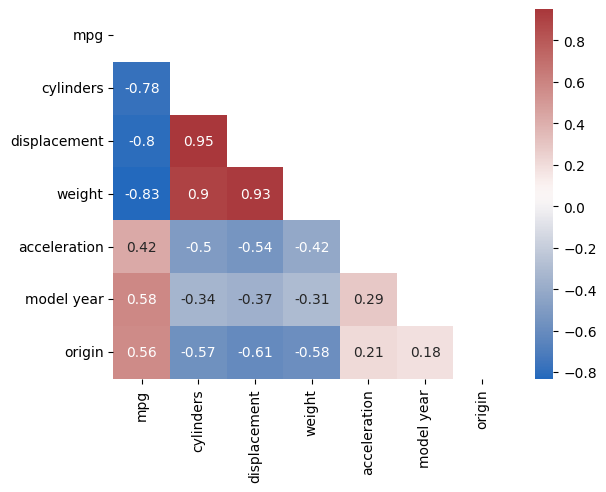

In [49]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='vlag',mask=np.triu(corr))

In [50]:
x= df.iloc[:,1:]
y=df.iloc[:, :1]

In [51]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train=train_test_split(x, y, train_size=0.8, random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

reg = LinearRegression()
reg2 = KNeighborsRegressor()
reg3 = HistGradientBoostingRegressor()

In [53]:
reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

pred = reg.predict(X_test)
pred2 = reg2.predict(X_test)
pred3 = reg3.predict(X_test)

C:\Users\ctoconnor\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
from sklearn.metrics import r2_score
LRscore = r2_score(y_test, pred)
Kscore = r2_score(y_test, pred2)
HGBRscore = r2_score(y_test, pred3)

print("Linear regression accuracy: ", LRscore)
print("K-nearest neighbors accuracy: ", Kscore)
print("Histogram gradient boosting accuracy: ", HGBRscore)

Linear regression accuracy:  0.8061854943486779
K-nearest neighbors accuracy:  0.7036137005381752
Histogram gradient boosting accuracy:  0.8298247026417722
